In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate



In [4]:
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('creditcard_2023.csv')

In [6]:
df=df.drop(['id'],axis=1)

In [7]:
df = df[["V2", "V4","V8", "V11", "V21","V27","Amount","Class"]]

In [8]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [10]:
print(f'Conjunto de treino : {X_train.shape}')
print(f'Conjunto de treino : {X_test.shape}')

Conjunto de treino : (454904, 7)
Conjunto de treino : (113726, 7)


In [11]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X_train)

y = sc_X.fit_transform(np.array(y_train).reshape(-1,1))

In [12]:
from sklearn.model_selection import GridSearchCV, KFold

In [13]:
from sklearn.metrics import make_scorer

In [14]:
splitter = KFold(n_splits = 5, shuffle = True, random_state = 42)
metrica = {'accuracy' :make_scorer(accuracy_score),
               'recall'   :make_scorer(recall_score),
               'precision':make_scorer(precision_score),
               'f1'       :make_scorer(f1_score)}

param_grid={'criterion':['entropy'],'max_depth':[2,5,10,20]}


DT =  DecisionTreeClassifier()


grid_DT = GridSearchCV(estimator = DT,
                           param_grid = param_grid,
                           scoring = metrica,
                           cv = splitter,
                           refit = 'f1',return_train_score = True)

grid_DT.fit(X_train, y_train) # aplicação do processo do GridSearch

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [2, 5, 10, 20]},
             refit='f1', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [15]:
grid_DT.best_params_

{'criterion': 'entropy', 'max_depth': 20}

In [16]:
grid_DT.best_score_

0.9900066639224814

In [17]:
Teste_DT = pd.DataFrame(grid_DT.cv_results_)

In [18]:
Teste_DT.columns.tolist()


['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_criterion',
 'param_max_depth',
 'params',
 'split0_test_accuracy',
 'split1_test_accuracy',
 'split2_test_accuracy',
 'split3_test_accuracy',
 'split4_test_accuracy',
 'mean_test_accuracy',
 'std_test_accuracy',
 'rank_test_accuracy',
 'split0_train_accuracy',
 'split1_train_accuracy',
 'split2_train_accuracy',
 'split3_train_accuracy',
 'split4_train_accuracy',
 'mean_train_accuracy',
 'std_train_accuracy',
 'split0_test_recall',
 'split1_test_recall',
 'split2_test_recall',
 'split3_test_recall',
 'split4_test_recall',
 'mean_test_recall',
 'std_test_recall',
 'rank_test_recall',
 'split0_train_recall',
 'split1_train_recall',
 'split2_train_recall',
 'split3_train_recall',
 'split4_train_recall',
 'mean_train_recall',
 'std_train_recall',
 'split0_test_precision',
 'split1_test_precision',
 'split2_test_precision',
 'split3_test_precision',
 'split4_test_precision',
 'mean_test_precision',
 'std_test_

In [19]:
Treino = Teste_DT[['params','mean_train_accuracy', 'std_train_accuracy',
                  'mean_train_recall', 'std_train_recall','mean_train_precision', 'std_train_precision',
                  'mean_train_f1', 'std_train_f1']]

In [20]:
Treino

,params,mean_train_accuracy,std_train_accuracy,mean_train_recall,std_train_recall,mean_train_precision,std_train_precision,mean_train_f1,std_train_f1
0,"{'criterion': 'entropy', 'max_depth': 2}",0.903529,0.000284,0.926877,0.000212,0.885446,0.000296,0.905688,0.000220
1,"{'criterion': 'entropy', 'max_depth': 5}",0.930855,0.000829,0.912432,0.009268,0.947422,0.008232,0.929516,0.001184
2,"{'criterion': 'entropy', 'max_depth': 10}",0.958877,0.000385,0.943790,0.002317,0.973121,0.001903,0.958227,0.000446
3,"{'criterion': 'entropy', 'max_depth': 20}",0.997801,0.000126,0.998448,0.000248,0.997156,0.000163,0.997802,0.000126


In [21]:
Teste = Teste_DT[['params','mean_test_accuracy','std_test_accuracy','mean_test_recall','std_test_recall',
          'mean_test_precision','std_test_precision',
          'mean_test_f1','std_test_f1','mean_fit_time','std_fit_time',
 'mean_score_time',
 'std_score_time']]

In [22]:
Teste

,params,mean_test_accuracy,std_test_accuracy,mean_test_recall,std_test_recall,mean_test_precision,std_test_precision,mean_test_f1,std_test_f1,mean_fit_time,std_fit_time,mean_score_time,std_score_time
0,"{'criterion': 'entropy', 'max_depth': 2}",0.903470,0.000891,0.926839,0.001183,0.885376,0.000760,0.905633,0.000695,4.783544,0.409162,0.241326,0.034474
1,"{'criterion': 'entropy', 'max_depth': 5}",0.930190,0.001317,0.912014,0.010474,0.946500,0.007611,0.928849,0.001884,10.760581,0.864071,0.212640,0.022085
2,"{'criterion': 'entropy', 'max_depth': 10}",0.957149,0.000611,0.942314,0.001928,0.971094,0.001898,0.956484,0.000544,16.864141,1.215019,0.200785,0.023495
3,"{'criterion': 'entropy', 'max_depth': 20}",0.989980,0.000384,0.993112,0.000773,0.986921,0.000076,0.990007,0.000382,19.032253,0.412083,0.193792,0.012264


In [23]:
Treino.to_csv('Treino2_dt')

In [24]:
Teste.to_csv('Teste2_dt')

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [26]:
y_pred= grid_DT.predict(X_test)

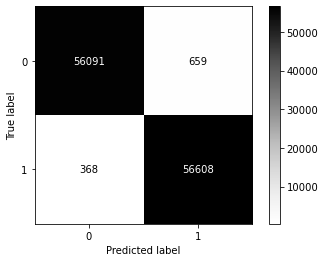

In [27]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot(cmap="Greys")

plt.show()